# Spam Classification

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words("english")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading dataset

For this project, we use "Spam filter" dataset from Kaggle.

In [2]:
data=pd.read_csv('emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### Understanding the dataset

We plot the given dataset using Matplotlib to understand the ratio of spam and ham messages and also the relation between the length of the message and the probability of it being a spam.

In [3]:
data["spam"].replace({0: "Ham", 1: "Spam"}, inplace=True)
data["spam"].value_counts()

Ham     4360
Spam    1368
Name: spam, dtype: int64

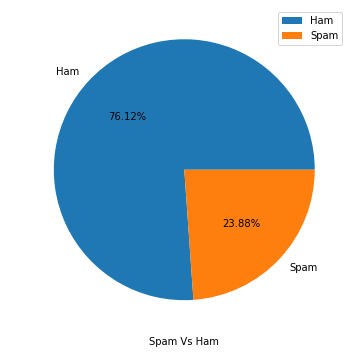

In [4]:
data["spam"].value_counts().plot(kind="pie", figsize = (6, 6), autopct = '%1.2f%%')
plt.xlabel("Spam Vs Ham")
plt.ylabel(" ")
plt.legend(["Ham", "Spam"])
plt.show()

### Text Preprocessing

In [6]:
# Removing punctuation
import string
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stop])

In [7]:
data['text']=data['text'].apply(process_text)
data['text']

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: text, Length: 5728, dtype: object

In [8]:
# Convert string data into Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow=cv.fit_transform(data['text'])

### Training the Model using Naive Bayes Classifier

In [9]:
Y=data['spam']
X=bow

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB().fit(X_train, Y_train)
Y_pred=model.predict(X_test)

### Checking the accuracy of the model

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)


0.9869109947643979